### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import statsmodels
import sklearn

### Importing dataset

In [3]:
df = pd.read_csv('housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [5]:
df.shape

(545, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Numerical variables/features/columns

In [9]:
num = ['price', 'area']
num

['price', 'area']

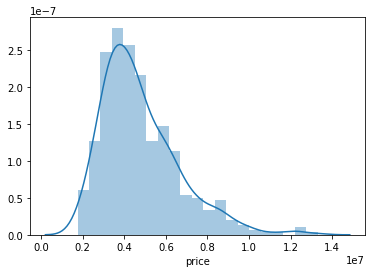

----------------------------------------------------------------------------------------------------


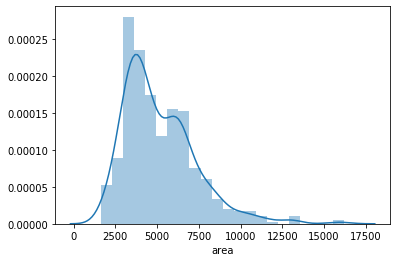

----------------------------------------------------------------------------------------------------


In [10]:
for i in num:
    sns.distplot(df[i])
    plt.show()
    print('-'*100)

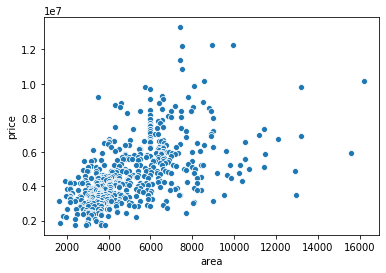

In [11]:
sns.scatterplot(x= 'area' , y = 'price', data = df)
plt.show()

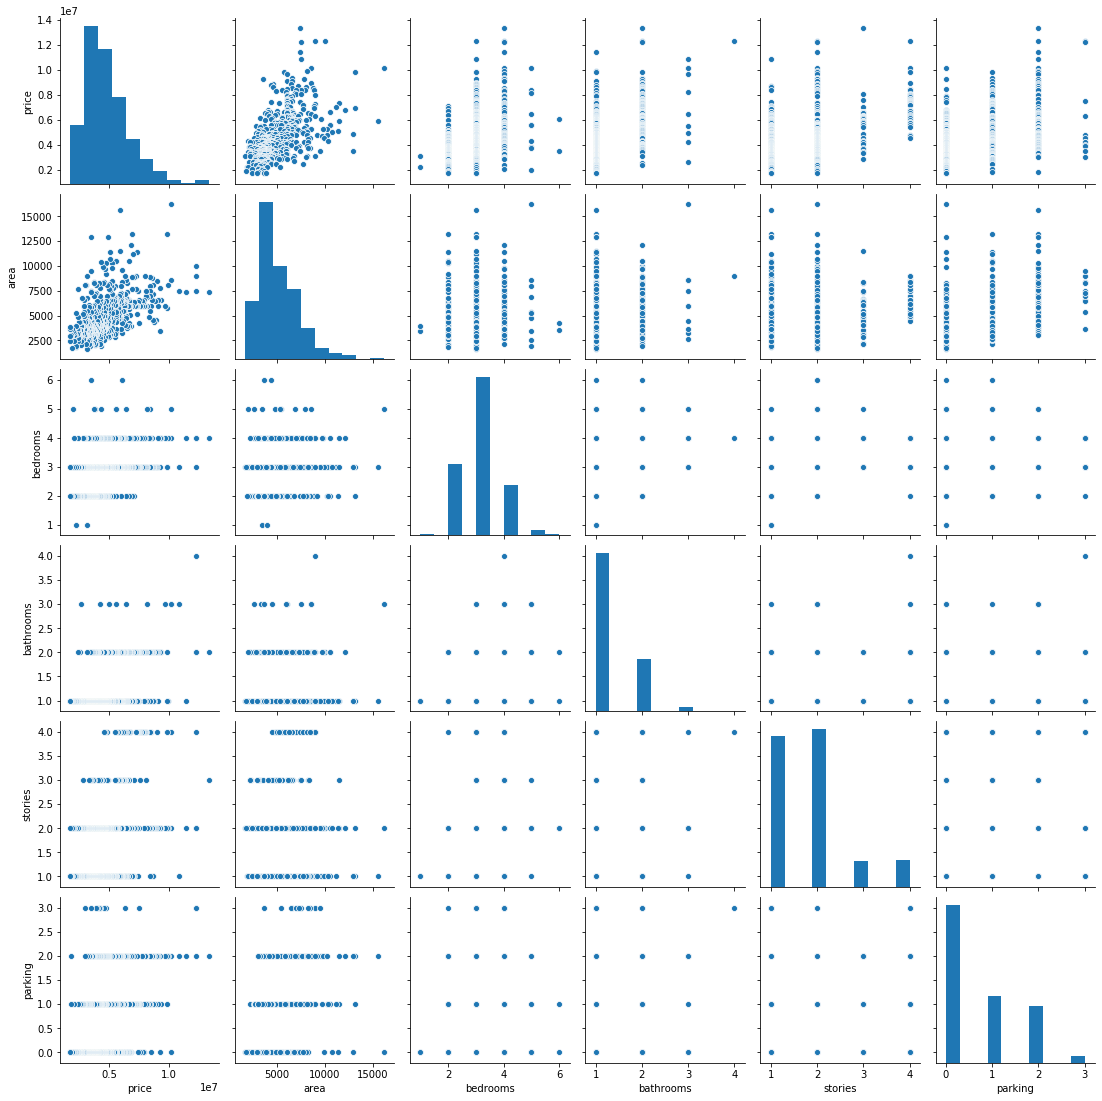

In [12]:
sns.pairplot(df)
plt.show()

### Categorical variables/features/columns

In [13]:
cat_binary = ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [14]:
cat_cat = ['bedrooms', 'bathrooms', 'stories', 'parking', 'furnishingstatus' ]

## Univariate analysis

yes    468
no      77
Name: mainroad, dtype: int64


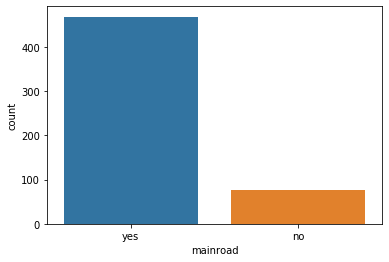

****************************************************************************************************
no     448
yes     97
Name: guestroom, dtype: int64


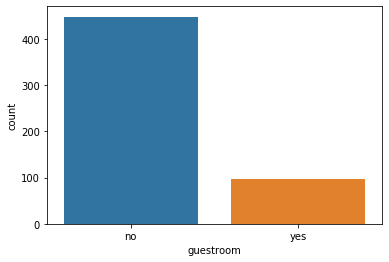

****************************************************************************************************
no     354
yes    191
Name: basement, dtype: int64


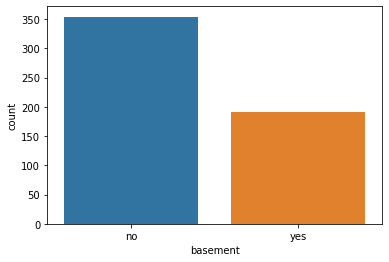

****************************************************************************************************
no     520
yes     25
Name: hotwaterheating, dtype: int64


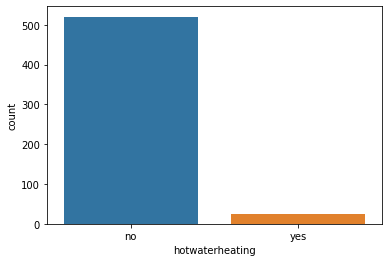

****************************************************************************************************
no     373
yes    172
Name: airconditioning, dtype: int64


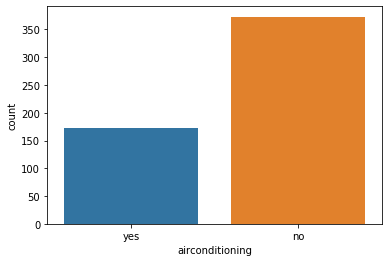

****************************************************************************************************
no     417
yes    128
Name: prefarea, dtype: int64


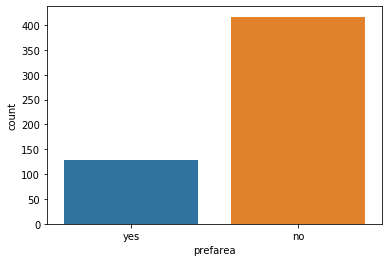

****************************************************************************************************


In [15]:
for i in cat_binary:
    print(df[i].value_counts())
    sns.countplot(df[i])
    plt.show()
    print('*'*100)

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64


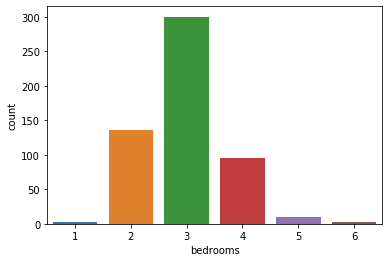

****************************************************************************************************
1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64


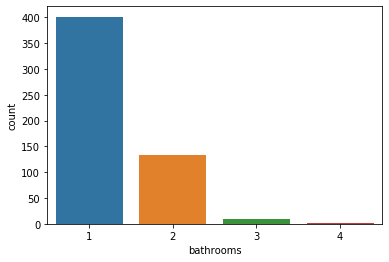

****************************************************************************************************
2    238
1    227
4     41
3     39
Name: stories, dtype: int64


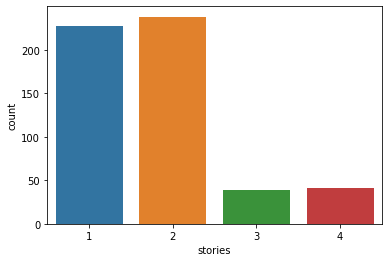

****************************************************************************************************
0    299
1    126
2    108
3     12
Name: parking, dtype: int64


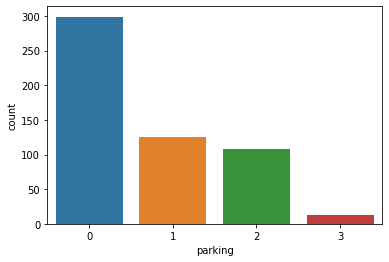

****************************************************************************************************
semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64


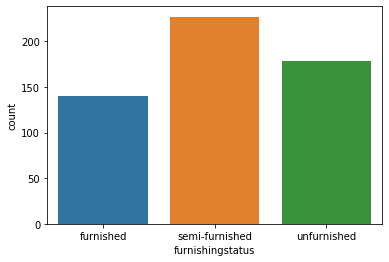

****************************************************************************************************


In [16]:
for i in cat_cat:
    print(df[i].value_counts())
    sns.countplot(df[i])
    plt.show()
    print('*'*100)

## Bivariate analysis

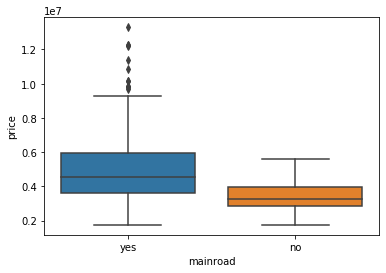

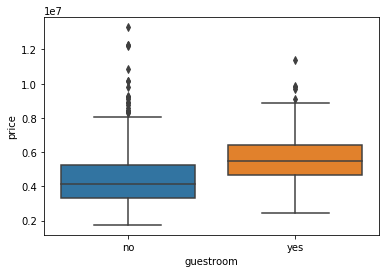

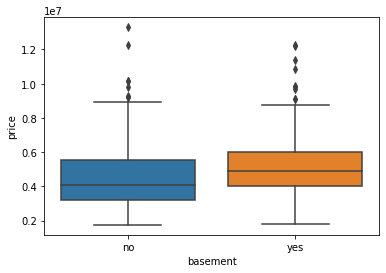

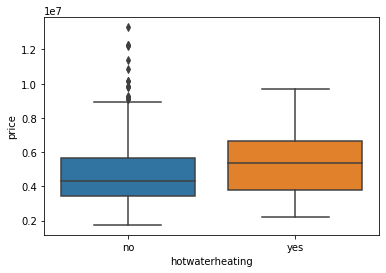

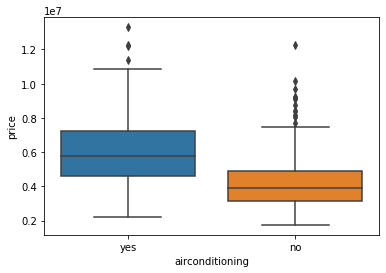

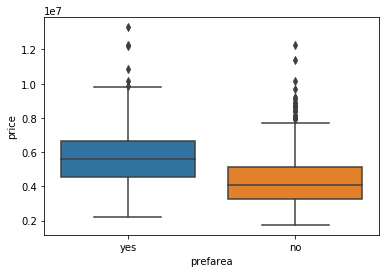

In [17]:
for i in cat_binary:
    sns.boxplot(x = df[i], y='price', data = df)
    plt.show()

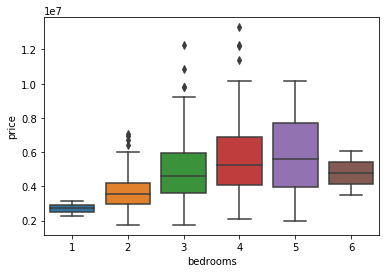

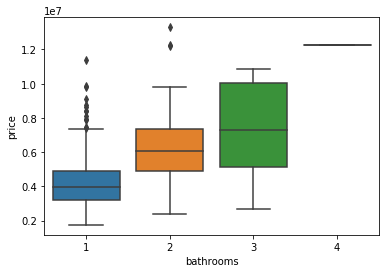

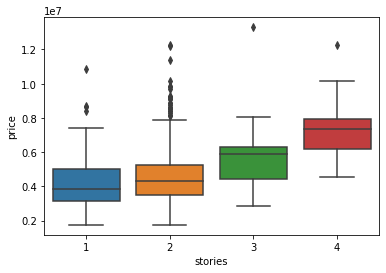

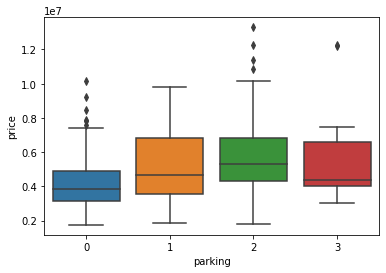

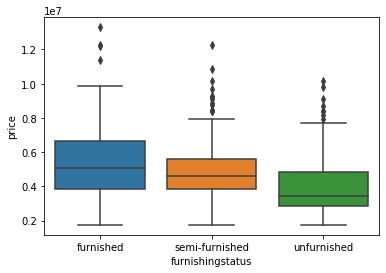

In [18]:
for i in cat_cat:
    sns.boxplot(x = df[i], y='price', data = df)
    plt.show()

In [19]:
corr = df.corr()

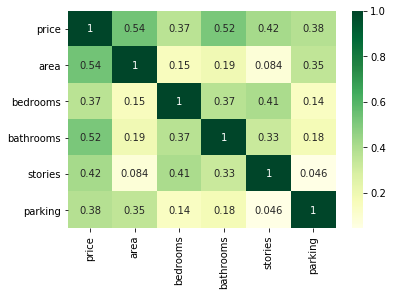

In [20]:
sns.heatmap(corr, cmap = 'YlGn', annot = True)
plt.show()

### Converting Categorical to Numerical by yes/no to 1/0

In [21]:
df[cat_binary] = df[cat_binary].apply(lambda x : x.map({'yes':1, 'no': 0}))

In [22]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


### Converting Categorical to Numerical  by dummy variables 0's and 1's

In [23]:
df = pd.get_dummies(df, columns = ['furnishingstatus'], drop_first = True)

In [24]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


### Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop('price',1)
y = df['price']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100 )

In [28]:
X_train.shape

(381, 13)

### Scaling - MinMaxScaler

In [29]:
from sklearn.preprocessing import MinMaxScaler

####  scaler1 for X variables and scaler2 for y variables

In [30]:
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

####  scaler1 for X variables

In [31]:
for_scaling = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
X_train[for_scaling] = scaler1.fit_transform(X_train[for_scaling])

In [34]:
X_test[for_scaling] = scaler1.transform(X_test[for_scaling])

In [35]:
y_train = y_train.values.reshape(-1,1)

In [36]:
y_test = y_test.values.reshape(-1,1)

####  scaler2 for y variables

In [37]:
y_train = scaler2.fit_transform(y_train)

In [38]:
y_test = scaler2.transform(y_test)

###  Building Model

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
m = LinearRegression()

In [41]:
m.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Predicting

In [42]:
y_train_pred = m.predict(X_train)

In [43]:
y_test_pred = m.predict(X_test)

#### Residual

In [44]:
res = y_train - y_train_pred

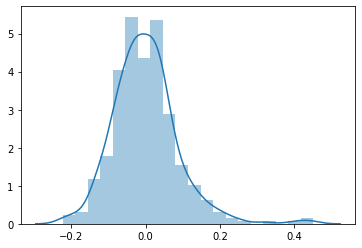

In [45]:
sns.distplot(res, bins = 20)
plt.show()

####  Results

In [46]:
m.coef_

array([[ 0.23466354,  0.04673453,  0.19082319,  0.10851563,  0.05044144,
         0.03042826,  0.02159488,  0.08486327,  0.06688093,  0.06073533,
         0.05942788,  0.00092052, -0.03100561]])

In [47]:
m.intercept_

array([0.02003284])

##  Coefficients

In [48]:
c = pd.DataFrame(list(X_train.columns), list(m.coef_.ravel()))
c

,0
0.234664,area
0.046735,bedrooms
0.190823,bathrooms
0.108516,stories
0.050441,mainroad
0.030428,guestroom
0.021595,basement
0.084863,hotwaterheating
0.066881,airconditioning
0.060735,parking


### Model Evaluation

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
from sklearn.metrics import mean_absolute_error

In [51]:
m.score(X_train, y_train)

0.6814893088451202

In [52]:
m.score(X_test, y_test)

0.6729582743459919

In [53]:
mean_squared_error(y_train, y_train_pred)

0.007891074947601205

In [54]:
mean_squared_error(y_test, y_test_pred)

0.009624780513466765

In [55]:
mean_absolute_error(y_train, y_train_pred)

0.06529126611986577

In [56]:
mean_absolute_error(y_test, y_test_pred)

0.07237224835503227